# Query data from overpassAPI (openstreetmaps)


query now with Python by using the requests package in order to access the Overpass API

https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0

## Area[] Berlin 
area["ISO3166-2"="DE-BE"]
https://www.openstreetmap.org/relation/62422

## admin_level=4
admin_level=2 through admin_level=10 allow for different administrative subdivision schemes to be handled in a consistent way by data consumers. The use of a numbering scheme rather than words for the values helps avoid confusion due to different terminology used in different countries
A data consumer looking for municipalities corresponding to "city", "town" or "village" boundaries will find these tagged anywhere from admin_level=4 (e.g. relation Berlin)

In [15]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-2"="DE-BE"][admin_level=4];
(node['shop'='convenience'](area);
 way['shop'='convenience' ](area);
 rel['shop'='convenience' ](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [16]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.57.2 48842a1b',
 'osm3s': {'timestamp_osm_base': '2022-05-30T14:47:17Z',
  'timestamp_areas_base': '2022-05-30T13:53:40Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 63253672,
   'lat': 52.4993218,
   'lon': 13.2961178,
   'tags': {'addr:city': 'Berlin',
    'addr:country': 'DE',
    'addr:housenumber': '39',
    'addr:postcode': '10711',
    'addr:street': 'Joachim-Friedrich-Straße',
    'addr:suburb': 'Halensee',
    'name': "Ku'damm Spätkauf & Kiosk",
    'opening_hours': '24/7',
    'shop': 'convenience'}},
  {'type': 'node',
   'id': 141469102,
   'lat': 52.5408415,
   'lon': 13.1474707,
   'tags': {'created_by': 'Potlatch 0.5d', 'shop': 'convenience'}},
  {'type': 'node',
   'id': 253616592,
   'lat': 52.5110467,
   'lon': 13.4626981,
   'tags': {'dog': 'no',
    'name': 'Kauf Markt9',
    'opening_hours': 'Mo-Fr

## Plotting 

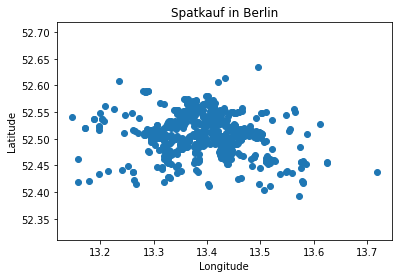

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))# Convert coordinates into numpy array
X = np.array(coords)

plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Spatkauf in Berlin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [23]:
import overpy

api = overpy.Overpass()
r_query = """
[out:json];
area["ISO3166-2"="DE-BE"][admin_level=4];
(node['shop'='convenience'](area);
 way['shop'='convenience' ](area);
 rel['shop'='convenience' ](area);
);
out center;
"""

coords  = []
coords += [(float(node.lon), float(node.lat)) 
           for node in r.nodes]
coords += [(float(way.center_lon), float(way.center_lat)) 
           for way in r.ways]
coords += [(float(rel.center_lon), float(rel.center_lat)) 
           for rel in r.relations]